In [21]:
import pandas as pd

# Load the data into a pandas DataFrame
data = pd.read_csv('spot_2.csv')
data.head()


,block_number,block_timestamp,transaction_hash,transaction_index,log_index,gas_price_eth,gas_price,trx_initiator,trx_destination,event_name,token0_in,token1_in,token0_out,token1_out,from_address,to_address,value,spot_price
0,16098989,2022-12-02 18:43:23.000,0x61f80bdd947371d2e2a733095224c3791ef6a9d09c71...,142,254,0.014268,19526874139,0xa308de214e01c365834e3344c1088b0d2b97559c,0x38f600e08540178719bf656e6b43fc15a529c393,NaN,NaN,NaN,NaN,NaN,0x0000000000000000000000000000000000000000,0x38f600e08540178719bf656e6b43fc15a529c393,2.039680,NaN
1,16098989,2022-12-02 18:43:23.000,0x61f80bdd947371d2e2a733095224c3791ef6a9d09c71...,142,257,0.014268,19526874139,0xa308de214e01c365834e3344c1088b0d2b97559c,0x38f600e08540178719bf656e6b43fc15a529c393,NaN,NaN,NaN,NaN,NaN,0x38f600e08540178719bf656e6b43fc15a529c393,0xa308de214e01c365834e3344c1088b0d2b97559c,2.039680,NaN
2,16098989,2022-12-02 18:43:23.000,0x61f80bdd947371d2e2a733095224c3791ef6a9d09c71...,142,258,0.014268,19526874139,0xa308de214e01c365834e3344c1088b0d2b97559c,0x38f600e08540178719bf656e6b43fc15a529c393,NaN,NaN,NaN,NaN,NaN,0x38f600e08540178719bf656e6b43fc15a529c393,0xa308de214e01c365834e3344c1088b0d2b97559c,0.000000,NaN
3,16098999,2022-12-02 18:45:23.000,0x1e5f3558f0cb81f658a8b63c63ab9c423a96af78f604...,138,243,0.002794,15176686844,0xa308de214e01c365834e3344c1088b0d2b97559c,0xc1f33e0cf7e40a67375007104b929e49a581bafe,NaN,NaN,NaN,NaN,NaN,0xa308de214e01c365834e3344c1088b0d2b97559c,0xc1f33e0cf7e40a67375007104b929e49a581bafe,0.018413,NaN
4,16098999,2022-12-02 18:45:23.000,0x1e5f3558f0cb81f658a8b63c63ab9c423a96af78f604...,138,244,0.002794,15176686844,0xa308de214e01c365834e3344c1088b0d2b97559c,0xc1f33e0cf7e40a67375007104b929e49a581bafe,NaN,NaN,NaN,NaN,NaN,0xa308de214e01c365834e3344c1088b0d2b97559c,0x0000000000000000000000000000000000000000,1.841280,NaN


In [22]:
data = data[data["event_name"] == "Swap"]

In [23]:
type(data)
data.dropna(subset=["event_name"], inplace=True)

In [24]:
# Sort the data by timestamp
data.sort_values(by='block_timestamp', inplace=True)
data.shape


(665, 18)

In [25]:

data.drop_duplicates(subset=["transaction_hash"], inplace=True)

In [26]:
data.shape

(665, 18)

In [27]:
data.drop_duplicates(subset=["transaction_hash"], inplace=True)
data.shape
data.fillna(0, inplace=True)
data["block_timestamp"] = pd.to_datetime(data["block_timestamp"])

for i in range(data.shape[0]):
    if(data["value"].iloc[i] == 0.00):
        #print(data["value"].iloc[0] , "   ",  (data["token1_in"].iloc[i] + data["token1_out"].iloc[i]))
        data["value"].iloc[i] = (data["token1_in"].iloc[i] + data["token1_out"].iloc[i])

C:\Users\user\AppData\Local\Temp\ipykernel_11560\2828775815.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["value"].iloc[i] = (data["token1_in"].iloc[i] + data["token1_out"].iloc[i])


In [28]:
LAST_7_DAYS = data[(data["block_timestamp"] >= dt1) & (data["block_timestamp"] <=dt2)]
LAST_7_DAYS["Sum"] = (LAST_7_DAYS["value"]) * LAST_7_DAYS["spot_price"]
LAST_7_DAYS = LAST_7_DAYS.groupby([LAST_7_DAYS["block_timestamp"].dt.day]).agg("sum")

C:\Users\user\AppData\Local\Temp\ipykernel_11560\962792247.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  LAST_7_DAYS["Sum"] = (LAST_7_DAYS["value"]) * LAST_7_DAYS["spot_price"]
C:\Users\user\AppData\Local\Temp\ipykernel_11560\962792247.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  LAST_7_DAYS = LAST_7_DAYS.groupby([LAST_7_DAYS["block_timestamp"].dt.day]).agg("sum")


In [29]:
LAST_7_DAYS

,block_number,transaction_index,log_index,gas_price_eth,gas_price,token0_in,token1_in,token0_out,token1_out,from_address,to_address,value,spot_price,Sum
block_timestamp,,,,,,,,,,,,,,
1,66143224,439,968,0.030176,113867930027,4046.164162,712.346641,812.821031,3524.779465,0,0,4237.126105,4.578035,4858.985193
2,297726438,1563,3373,0.101725,399706582288,17591.461410,41832.011679,47654.893508,15348.746181,0,0,57180.757860,20.518949,65246.354918
3,33097049,136,246,0.016678,63700351675,7138.383861,4026.126029,4580.753202,6237.443162,0,0,10263.569190,2.282198,11719.137063
4,215212920,834,1922,0.067225,268765984087,613.481084,26942.776520,30590.367462,537.600793,0,0,27480.377313,14.784280,31203.848546
5,82811917,853,1409,0.020062,98906250479,664.011047,815.966939,924.755680,582.391481,0,0,1398.358420,5.680216,1588.766727
6,49706738,188,507,0.018408,70563124329,15000.000000,5381.860215,6098.934689,13152.360492,0,0,18534.220707,3.408058,21098.934689
7,49727637,112,471,0.023848,80846802845,8177.818314,7122.522395,8084.447593,7161.618534,0,0,14284.140928,3.418956,16262.265907


In [30]:
from datetime import datetime
dt = "2023-02-01"
dt1 = datetime.strptime(dt, "%Y-%m-%d")
print(dt)
dt = "2023-02-08"
dt2 = datetime.strptime(dt, "%Y-%m-%d")

2023-02-01


<AxesSubplot:xlabel='Time', ylabel='Sum'>

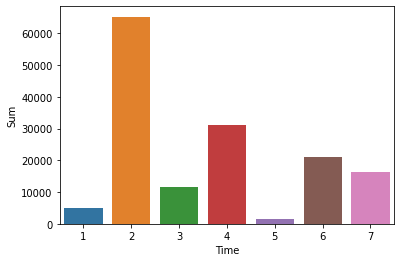

In [33]:
import seaborn as sns

sns.barplot(LAST_7_DAYS, x = "Time", y = "Sum")

In [32]:
LAST_7_DAYS["Time"] = LAST_7_DAYS.index